In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from joblib import dump, load

%autosave 0 

Autosave disabled


In [2]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=[['Path_vit']]
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))



In [3]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [4]:
ccxyth,ccvk=np.load('ccxyth.npy'),np.load('ccvk.npy')
A,B,PI = np.load('A.npy'),np.load('B.npy'),np.load('PI.npy')
Modelo= HMM(A,B,PI)


In [5]:
calculate=False
if (calculate):
    datamugroso=pd.read_csv('pddata.csv')
    data= datamugroso.iloc[:,1:]
    x_noise,y_noise,th_noise=np.zeros(data.x.shape),np.zeros(data.x.shape),np.zeros(data.x.shape)
    x_noise[0],y_noise[0],th_noise[0]= data[['x','y','theta']].iloc[0]
    cumx,cumth=0,0
    for i in range (len(data)-1):
        delta_movx,delta_movy,delta_movth=(data.x.iloc[i]-data.x.iloc[i+1]),(data.y.iloc[i]-data.y.iloc[i+1]),(data.theta.iloc[i]-data.theta.iloc[i+1])
        if (data.Y.iloc[i]==data.Y.iloc[i+1]):
            x_noise[i+1]=x_noise[i] -   delta_movx +  np.random.normal(0,.1,1) *.1
            y_noise[i+1]=y_noise[i] -   delta_movy +  np.random.normal(0,.1,1) *.1
            th_noise[i+1]=th_noise[i] -   delta_movth +  np.random.normal(0,.1,1) *.1
        else:
            x_noise[i+1]=data.x.iloc[i+1]
            y_noise[i+1]=data.y.iloc[i+1]
            th_noise[i+1]=data.theta.iloc[i+1]
    data['x_noise']= x_noise
    data['y_noise']= y_noise
    data['th_noise']=th_noise


    aus=[]
    xyth=data[['x_noise','y_noise','th_noise']]
    for i in xyth.values:
        _, au= quantized(i , ccxyth)
        aus.append(au)

    data['Y_noise']=aus

    data.to_csv('deltaodom.csv')

    

    


    """diffs=[]
    for i in range(len(data)-1):
        xyth= data[['x','y','theta']].iloc[i].values
        xyth2= data[['x','y','theta']].iloc[i+1].values
        diffs.append(np.linalg.norm(xyth2-xyth))

    diffs.insert(0,0)

    data['deltaPose']=diffs
    data.describe()
    data.to_csv('deltaodom.csv')"""
else:
    datamugroso=pd.read_csv('deltaodom.csv')
    data= datamugroso.iloc[:,1:]
    


obs,est= data['Vk'].values,data['Y_noise'].values


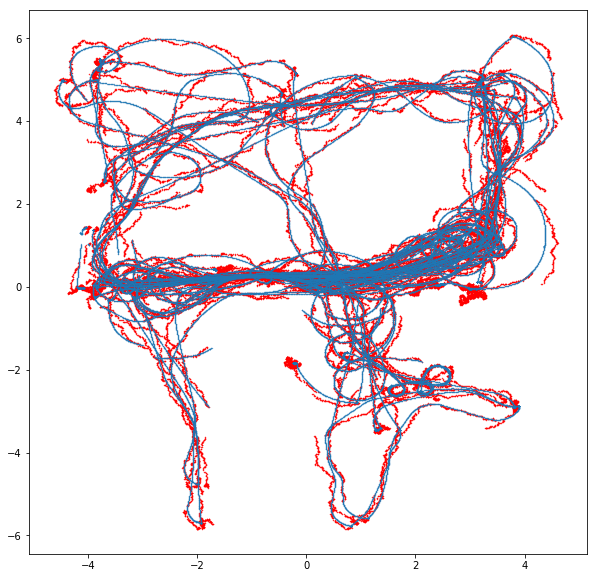

In [7]:


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x=data.x_noise,y=data.y_noise, s=.2 ,c='r' )
ax1.scatter(x=data.x,y=data.y, s=.1)

In [8]:
####BAUM WELCH APPROX###############???!?!?!


N=est.max()+1 
K_corpus= obs.max()+1
TRANS=np.zeros((N,N))
for i in range (N):
    fromTO=[]


    indices=np.asarray(np.where(est==i)).ravel()
   

    for indice in indices:

        if (int(indice)==len(est)-1):
            
            indice=indice-1

        fromTO.append(est[indice+1])
    fromTO.append(0)
    fromTO.append(N-1)
    aux=np.asarray(np.bincount(fromTO    ))
    aux[0]=aux[0]-1
    aux[N-1]=aux[N-1]-1
    
    TRANS[i,:]=aux
TRANS=TRANS/TRANS.sum(axis=1)
#####################################3
EMIS= np.zeros((N,K_corpus))
for Vk in range (K_corpus):

    indices=np.asarray(np.where(obs==Vk)).ravel()
    estconvk= est[indices]

    numestenvk=np.bincount(estconvk)
    if (N-len(numestenvk)>0):
        numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
    EMIS[:,Vk]=(numestenvk/np.bincount(est))

A,B=TRANS,EMIS
PI=np.ones(N)/N
Modelo1=HMM(A,B,PI)
Modelo2= HMM(A,B,PI)
Modelo2.B=B+.0000001
Modelo2.A=A+.0000001


save= False
    
    if (save):

    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A2.npy',Modelo1.A)
    np.save('B2.npy',Modelo1.B)
    np.save('PI2.npy',Modelo1.PI)
    print("MODEL SAVED")
    B.shape

MODEL SAVED


(128, 256)

In [9]:
A.shape

(128, 128)

In [10]:


obs,est= data['Vk'].values,data['Y'].values


In [11]:
####BAUM WELCH APPROX###############???!?!?!


N=est.max()+1 
K_corpus= obs.max()+1
TRANS=np.zeros((N,N))
for i in range (N):
    fromTO=[]


    indices=np.asarray(np.where(est==i)).ravel()
   

    for indice in indices:

        if (int(indice)==len(est)-1):
            
            indice=indice-1

        fromTO.append(est[indice+1])
    fromTO.append(0)
    fromTO.append(N-1)
    aux=np.asarray(np.bincount(fromTO    ))
    aux[0]=aux[0]-1
    aux[N-1]=aux[N-1]-1
    
    TRANS[i,:]=aux
TRANS=TRANS/TRANS.sum(axis=1)
#####################################3
EMIS= np.zeros((N,K_corpus))
for Vk in range (K_corpus):

    indices=np.asarray(np.where(obs==Vk)).ravel()
    estconvk= est[indices]

    numestenvk=np.bincount(estconvk)
    if (N-len(numestenvk)>0):
        numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
    EMIS[:,Vk]=(numestenvk/np.bincount(est))

A,B=TRANS,EMIS
PI=np.ones(N)/N
Modelo1=HMM(A,B,PI)
Modelo2= HMM(A,B,PI)
Modelo2.B=B+.0000001
Modelo2.A=A+.0000001


save= False
    
    if (save):

    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A.npy',Modelo1.A)
    np.save('B.npy',Modelo1.B)
    np.save('PI.npy',Modelo1.PI)
    print("MODEL SAVED")
    B.shape

MODEL SAVED


(128, 256)